# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience </a>

In [1]:
# Bot check

# HW_ID: phds_sem7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.



In [17]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

%matplotlib inline
sns.set_style("whitegrid")

### Асимптотическая нормальность оценки
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.

В чем заключается смысл свойства асимптотической нормальности?

**Ответ:** при больших n: $\sqrt{n} \frac{\widehat{\theta} - \theta}{\sigma(\theta)} \rightarrow \mathcal{N}(0, 1)$ по распрделению

Возьмем функцию визуализации с прошлой практики.

In [55]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''
    
    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:
        
        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]
        
    else: 
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]
    
    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((0, 5))
    plt.legend(handels, labels)
    plt.xlim((0, xlim));
    plt.show()

Зададим параметры эксперимента


In [56]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок


Сгенерируем множество выборок (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [57]:
# генерируем множество выборок,
# параметр theta является обратным к параметру масштаба
samples = sps.expon(scale=1/theta).rvs(size=(sample_count, sample_size))

Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [58]:
n_range = (np.arange(sample_size) + 1)
sample_means = np.cumsum(samples, axis=1) / n_range
estimation = 1 / sample_means

Добавим доверительный интервал для нашей оценки.

In [86]:
alpha = 0.95
right = theta + sps.norm(scale=1).ppf((1+alpha)/2) * theta / np.sqrt(n_range)
left = theta - sps.norm(scale=1).ppf((1+alpha)/2) * theta / np.sqrt(n_range)

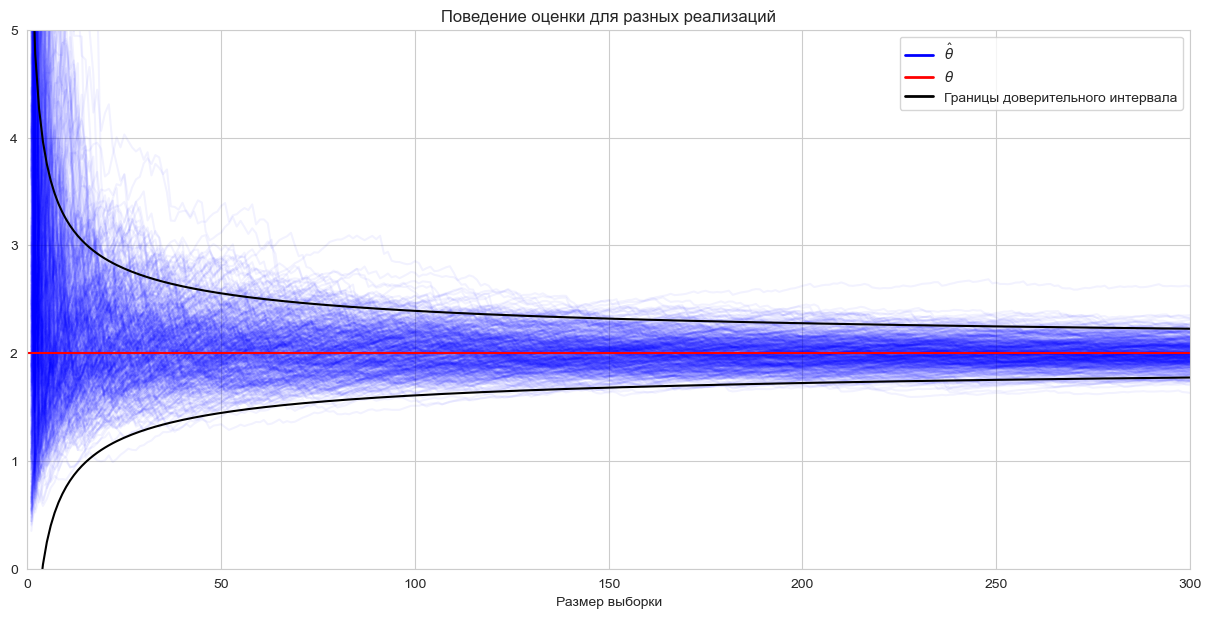

In [87]:
est_plot(estimation, sample_count, sample_size, left=left, right=right)

**Вывод:** Видим, что интервалы асимптотически доверительны с уровнем 0.95, так как оценка всё лучше попадает в область внутри границ доверительного интервала с ростом выборки

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

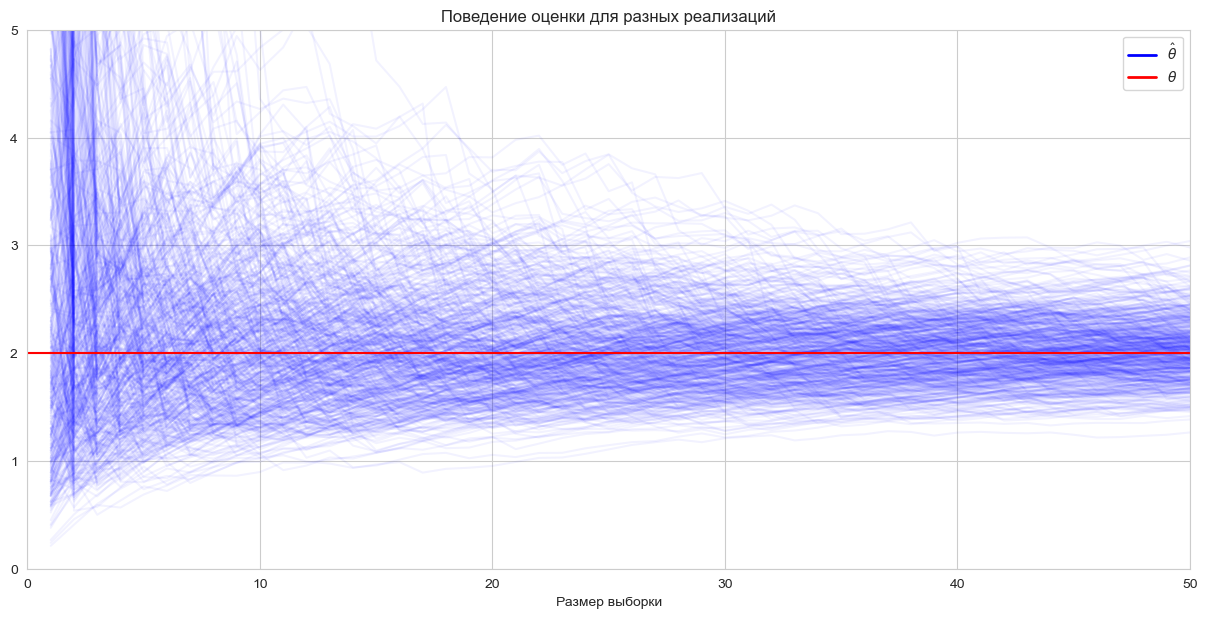

In [33]:
est_plot(estimation, sample_count, sample_size, left=left, right=right, xlim = 50)

**Вывод:** В начале происхожит очень быстрое сжатие